#  Welcome to Space Application Part 3

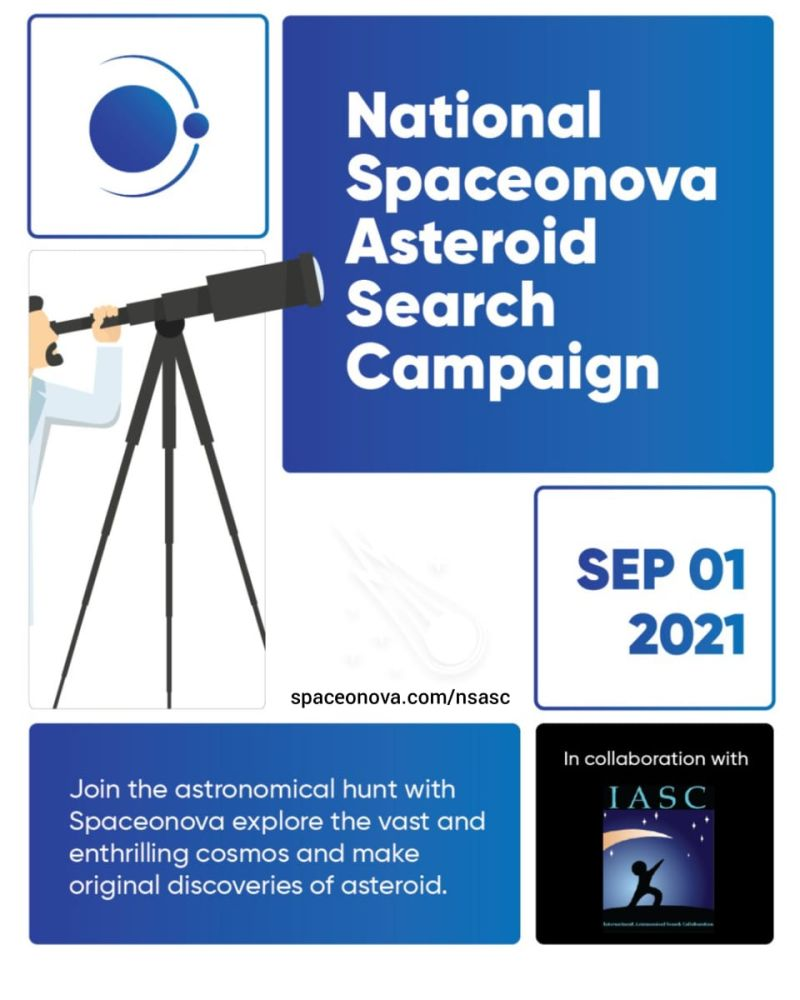

# https://spaceonova.com/nsasc

# Age of the universe

## Constants

Constants are Quantity objects 

You can easilty convert them to different units for example

In [8]:
from astropy import constants as const

In [9]:
print(const.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


In [11]:
print(const.c.to('km/s'))

299792.458 km / s


In [4]:
print(const.c.to('pc/yr'))
print(const.c.to('AU/s'))

0.30660139378555057 pc / yr
0.0020039888041000035 AU / s


## Units 

In [5]:
from astropy import units as u

In [15]:
(42.0*u.meter).to('cm')

<Quantity 4200. cm>

In [7]:
import numpy as np
np.array([1,2,3])*u.centimeter

<Quantity [1., 2., 3.] cm>

## Calculating Hubble's Constant

We will start from a small sample.

In [17]:
import numpy as np
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
plt.rc('text',usetex=False)
plt.rc('font',family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14) 
%matplotlib inline

Let's import the txt file and analyze it's data

In [18]:
data_1 = np.genfromtxt('supernova.txt',dtype='float')

In [30]:
data_1[:,0]
#Extract the first column, i.e. the column with 0.014,0.018 and so on.......
# data_1[1:] #a
# data_1[:1] #b
# data_1[0:] #c
# data_1[:0] #d
# NOTA #e
# data_1[:,0] #a
# data_1[1,:] #b
#NOTA c


array([0.014, 0.018, 0.02 , 0.026, 0.026, 0.03 , 0.036, 0.043, 0.045,
       0.05 , 0.05 , 0.052, 0.063, 0.071, 0.075, 0.079, 0.088, 0.101,
       0.172, 0.18 , 0.32 , 0.354, 0.372, 0.374, 0.374, 0.378, 0.388,
       0.4  , 0.416, 0.42 , 0.425, 0.43 , 0.43 , 0.45 , 0.45 , 0.45 ,
       0.453, 0.458, 0.465, 0.472, 0.48 , 0.49 , 0.495, 0.498, 0.526,
       0.55 , 0.57 , 0.579, 0.58 , 0.581, 0.592, 0.612, 0.615, 0.619,
       0.655, 0.656, 0.657, 0.763, 0.828, 0.83 ])

In [12]:
const.c.to('km/s')

<Quantity 299792.458 km / s>

The distace is taken in Mpc

In [13]:
(1*u.Unit('Mpc')).to('m')

<Quantity 3.08567758e+22 m>

We have redshift, we ned to convert into Recessional velocity. *Recessional velocity* is the rate at which an extragalactic astronomical object recedes from an observer as a result of the expansion of the universe. The product of redshift and speed of light gives us the same.

In [31]:
d = data_1[:,1] * u.Unit('Mpc') #Distance to Supernova
v = data_1[:,0] * const.c #Redshift * Speed of light = velocity
# dd= data_1[:,2] * u.Unit('Mpc')

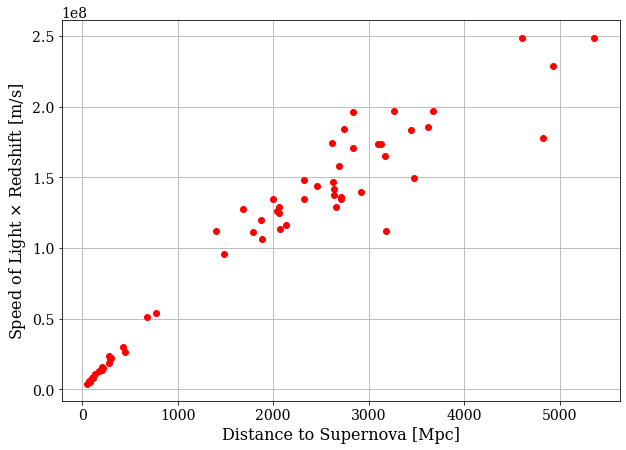

In [32]:
plt.plot(d.value,v.value,'ro')
plt.xlabel('Distance to Supernova [Mpc]',fontsize=16)
plt.ylabel(r'Speed of Light $\times$ Redshift [m/s]',fontsize=16)
plt.gcf().set_size_inches(10,7)
plt.grid()

\begin{equation*}
y=mx+b
\end{equation*}

\begin{equation*}
{Denominator=D}= \sum\frac{1}{dy^2}\sum\left(\frac{x}{dy}\right)^2 - \left(\sum\left(\frac{x}{dy^2}\right)\right)^2\end{equation*}


\begin{equation*}
{m}=\frac{\sum\frac{1}{dy^2} \sum\frac{xy}{dy^2} - \sum\frac{x}{dy^2}\sum\frac{y}{dy^2}}{D}
\end{equation*}

\begin{equation*}
{b}=\frac{\sum\frac{x^2}{dy^2}\sum\frac{y}{dy^2} - \sum\frac{x}{dy^2}\sum\frac{xy}{dy^2}}{D^2}
\end{equation*}

\begin{equation*}
{d_m}=\sqrt{\frac{\sum\frac{1}{dy^2}}{D}}
\end{equation*}

\begin{equation*}
{d_b}=\sqrt{\frac{\sum\frac{x}{dy^2}}{D}}
\end{equation*}

In [40]:
def OLSfit(x, y, dy=None):
    """Find the best fitting parameters of a linear fit to the data through the 
    method of ordinary least squares estimation. (i.e. find m and b for 
    y = m*x + b)
    
    Args:
        x: Numpy array of independent variable data
        y: Numpy array of dependent variable data. Must have same size as x.
        dy: Numpy array of dependent variable standard deviations. Must be same 
            size as y.

    Returns: A list with four floating point values. [m, dm, b, db]
    """
    if dy is None:
        #if no error bars, weight every point the same
        dy = np.ones(x.size)
    denom = np.sum(1 / dy**2) * np.sum((x / dy)**2) - (np.sum(x / dy**2))**2
    m = (np.sum(1 / dy**2) * np.sum(x * y / dy**2) - 
         np.sum(x / dy**2) * np.sum(y / dy**2)) / denom
    b = (np.sum(x**2 / dy**2) * np.sum(y / dy**2) - 
         np.sum(x / dy**2) * np.sum(x * y / dy**2)) / denom
    dm = np.sqrt(np.sum(1 / dy**2) / denom)
    db = np.sqrt(np.sum(x / dy**2) / denom)
    return([m, dm, b, db])

In [17]:
bestfit_1 = OLSfit(d,v)
print(bestfit_1)
slope_1 = bestfit_1[0]
intercept_1 = bestfit_1[2]

[<Quantity 48081.0653745 m / (Mpc s)>, <Quantity 9.12643888e-05 1 / Mpc>, <Quantity 14506988.84841955 m / s>, <Quantity 0.00403292 1 / Mpc(1/2)>]


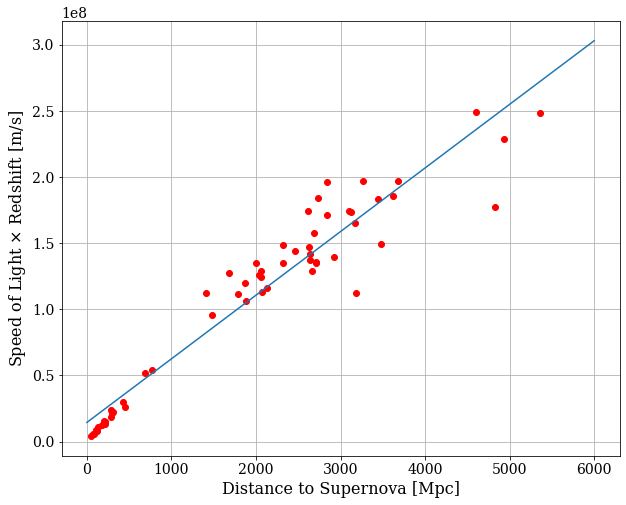

In [18]:
plt.plot(d.value,v.value,'ro')
plt.xlabel('Distance to Supernova [Mpc]',fontsize=16)
plt.ylabel(r'Speed of Light $\times$ Redshift [m/s]',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.plot(np.array(slope_1.value*np.arange(0,6000)+intercept_1.value))
plt.grid()

In [19]:
Ho = bestfit_1[0].to('km/(Mpc s)')
print ('Hubble constant is',Ho)

Hubble constant is 48.08106537450494 km / (Mpc s)


 If we take the reciprocal of the above value, we'll reach our desired destination.

In [20]:
yr=1/Ho
print('Age of the universe is',yr.to('yr').value/(10**9),"billion years")

Age of the universe is 20.336326037385707 billion years


## We also have data that we obtained from SDSS3 Archive, Let's analyze it

In [34]:
data = np.genfromtxt('supernovaDistanceRedshift.csv',delimiter=',',dtype='float',skip_header=1)

In [41]:
data

array([[           nan, 8.87741476e+02, 1.58880000e-01, 6.14760000e-02],
       [           nan, 1.32923569e+03, 2.48201000e-01, 4.21530000e-02],
       [           nan, 5.55676112e+02, 1.23402000e-01, 8.95300000e-03],
       [           nan, 1.34657140e+03, 3.51156000e-01, 1.36484000e-01],
       [           nan, 1.32692929e+03, 2.43986000e-01, 3.24510000e-02],
       [           nan, 1.05265552e+03, 3.52455000e-01, 9.38890000e-02],
       [           nan, 1.48128809e+03, 3.70539000e-01, 1.45161000e-01],
       [           nan, 1.79520266e+03, 4.28732000e-01, 1.11509000e-01],
       [           nan, 8.74353829e+02, 1.90542000e-01, 3.58930000e-02],
       [           nan, 6.80452921e+02, 8.37400000e-02, 2.14140000e-02],
       [           nan, 1.49489667e+03, 3.39971000e-01, 6.10850000e-02],
       [           nan, 8.44830589e+02, 1.26061000e-01, 2.94040000e-02],
       [           nan, 3.94924658e+02, 7.93030000e-02, 2.37770000e-02],
       [           nan, 1.26004906e+03, 1.91912000e

In [42]:
distance = data[:,1] * u.Unit('Mpc')
z = data[:,2] * const.c
dz = data[:,3] * const.c

Our data had uncertanity in the measured redshift if I recall correctly, Let's make a plot and visualiz the same with error bars. You'll be surprised with the result.

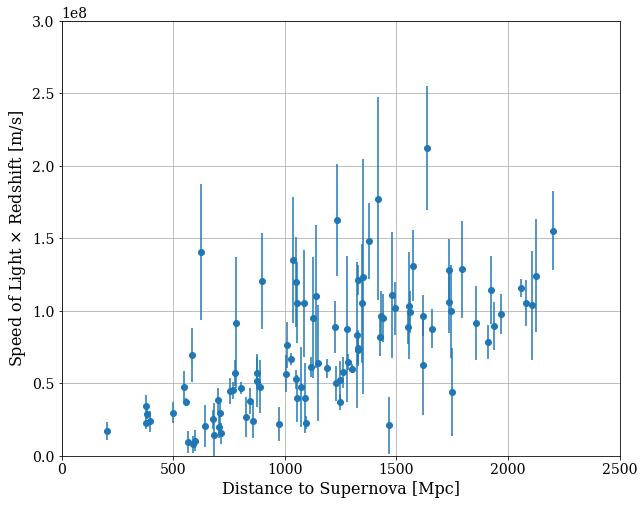

In [43]:
plt.errorbar(distance.value,z.value,yerr=dz.value,fmt='o')
plt.ylim(0,3e8)
plt.xlim(0,2500)
plt.xlabel('Distance to Supernova [Mpc]',fontsize=16)
plt.ylabel(r'Speed of Light $\times$ Redshift [m/s]',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.grid()


DAMN!!!<br>
LOOOOK AT THOSE ERROR BARS!<br>
But no worries, we can still get what we want. We'll start by finding the best fitof the data.

In [44]:
bestfit = OLSfit(distance,z,dz)
print(bestfit)
slope = bestfit[0]
intercept = bestfit[2]

[<Quantity 48981.78107497 m / (Mpc s)>, <Quantity 2155.7400255 m / (Mpc s)>, <Quantity 2417784.36195081 m / s>, <Quantity 64820.87792754 m / (Mpc(1/2) s)>]


## Magic time

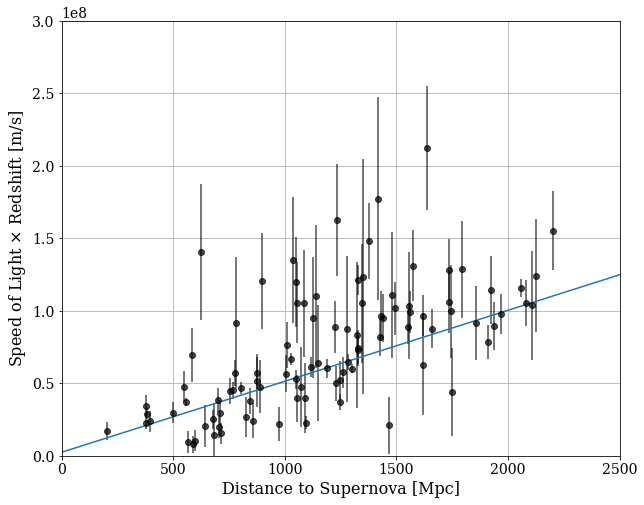

In [45]:
plt.errorbar(distance.value,z.value,yerr=dz.value,fmt='o',color='black',alpha=0.7)
plt.ylim(0,3e8)
plt.xlim(0,2500)
plt.xlabel('Distance to Supernova [Mpc]',fontsize=16)
plt.ylabel(r'Speed of Light $\times$ Redshift [m/s]',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.plot(np.array(slope.value*np.arange(0,2500)+intercept.value))
plt.grid()

In [46]:
H0 = bestfit[0].to('km/(Mpc s)')
dH0 = bestfit[1].to('km/(Mpc s)')
print ('Hubble constant is',H0,'+/-',dH0)

Hubble constant is 48.981781074968154 km / (Mpc s) +/- 2.155740025498166 km / (Mpc s)


### If we take the reciprocal of the above value, we'll reach our desired destination.

In [47]:
yr=1/H0
print('Age of the universe is',yr.to('yr').value/(10**9),"billion years")

Age of the universe is 19.96236560251346 billion years


The bestfit line to the supernova data gives a value for $H_0$, the expansion rate of the universe, of $H_0=49\pm2$ km/(Mpc s). The Planck mission measured fluctuations in the cosmic microwave background to obtain a value of $H_0=67.80\pm0.77$ km/(Mpc s) (https://arxiv.org/abs/1303.5062) The result derived from this supernova dataset disagrees with the much more precise Planck value. This discrepancy is likely caused by the large uncertainties associated with the measurements of redshift for the supernovae and the fact that the sample is relatively small. The exact value of the Hubble constant is still somewhat uncertain. The value calculated here is, however, inconsistent with a static or contracting universe, and supports the observation that the universe is expanding.

A galaxy 1 megaparsec away will be moving away from us at a speed of 65 km/sec, while another galaxy 100 megaparsecs away will be receding at 100 times this speed. So essentially, the Hubble constant reflects the rate at which the universe is expanding. We have came to the same conclusion as Edwin Hubble!

.

.

.

.

# Exoplanets

Go to https://exoplanetarchive.ipac.caltech.edu/ and then "Data"

In [52]:
%matplotlib inline
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
planets = pd.read_csv("PSCompPars_2020.12.17_02.26.55.csv",skiprows=101)
planets["discoverymethod"]

0       Radial Velocity
1       Radial Velocity
2       Radial Velocity
3       Radial Velocity
4       Radial Velocity
             ...       
4302    Radial Velocity
4303    Radial Velocity
4304    Radial Velocity
4305    Radial Velocity
4306    Radial Velocity
Name: discoverymethod, Length: 4307, dtype: object

<AxesSubplot:xlabel='sy_pnum', ylabel='discoverymethod'>

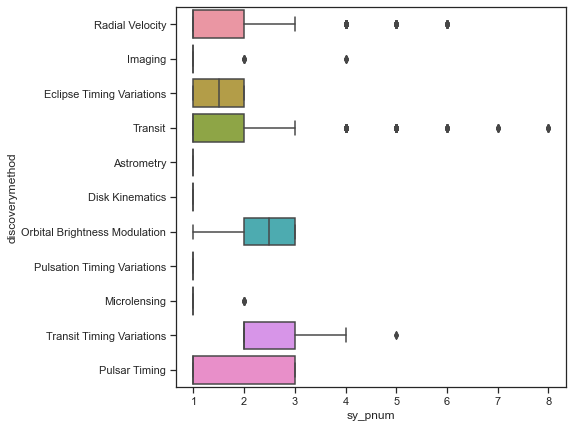

In [55]:
sb.set(style="ticks")

f, ax = plt.subplots(figsize=(7, 7))
# ax.set_xscale("log")

sb.boxplot(x="sy_pnum", y="discoverymethod", data=planets) 


<AxesSubplot:xlabel='pl_bmasse', ylabel='discoverymethod'>

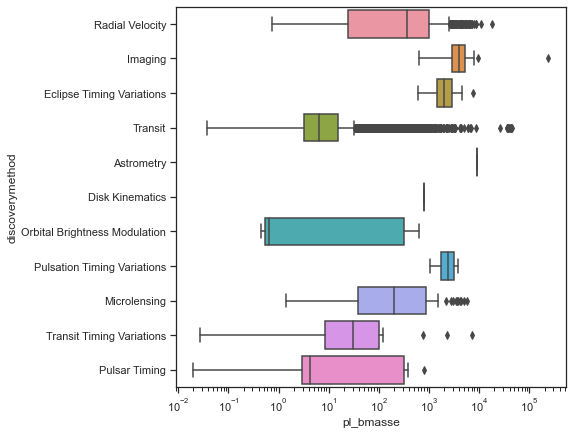

In [4]:
sb.set(style="ticks")

f, ax = plt.subplots(figsize=(7, 7))
ax.set_xscale("log")

sb.boxplot(x="pl_bmasse", y="discoverymethod", data=planets) 

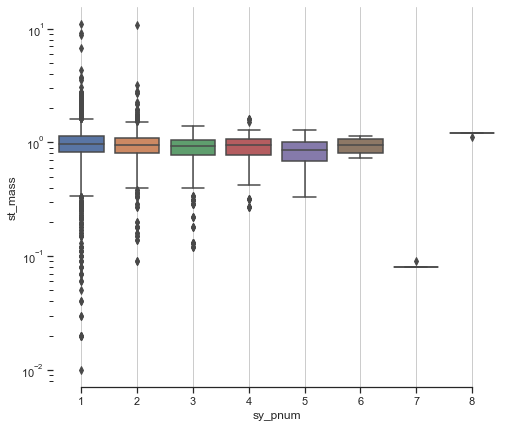

In [48]:
sb.set(style="ticks")

f, ax = plt.subplots(figsize=(8, 7))
ax.set_yscale("log")
planets = pd.read_csv(r"C:\Users\souti\Downloads\PSCompPars_2020.12.17_02.26.55.csv",skiprows=101)

sb.boxplot(x="sy_pnum", y="st_mass", data=planets) 

# sb.swarmplot(x="sy_pnum", y="st_mass", data=planets,size=2, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="st_mass")
sb.despine(trim=True, left=True)

.

.

## Rocket Equation

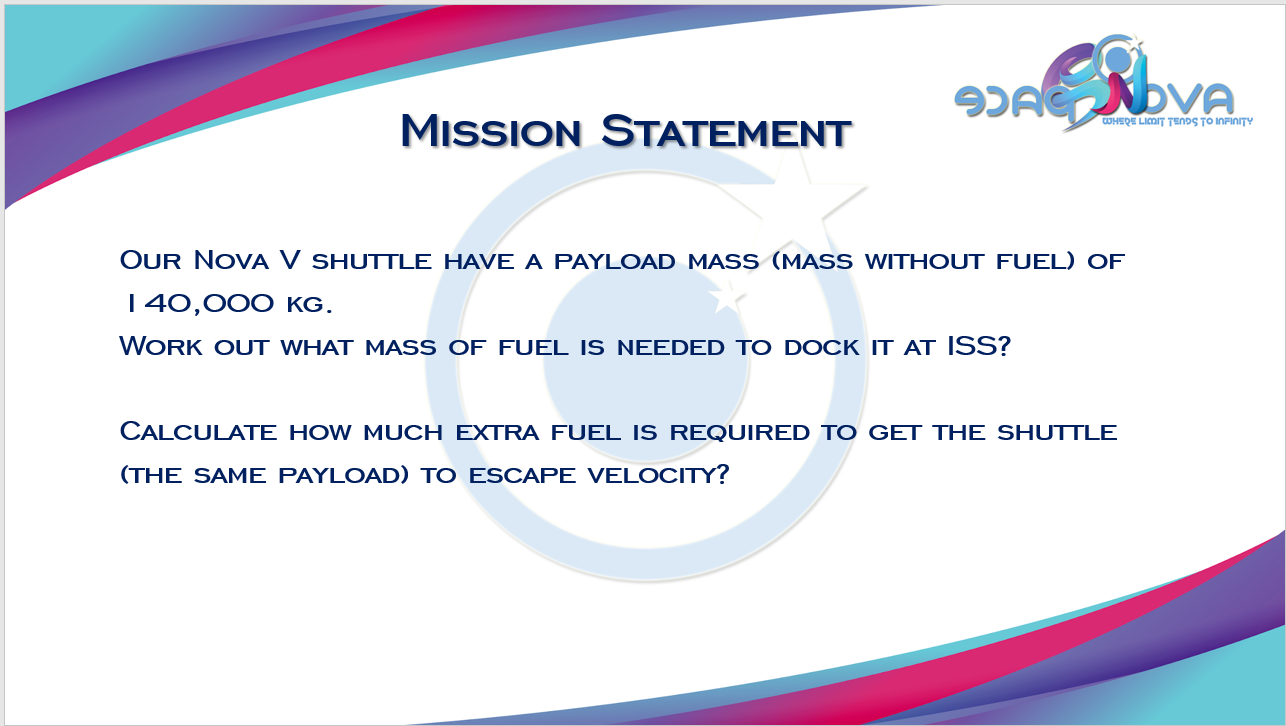

# 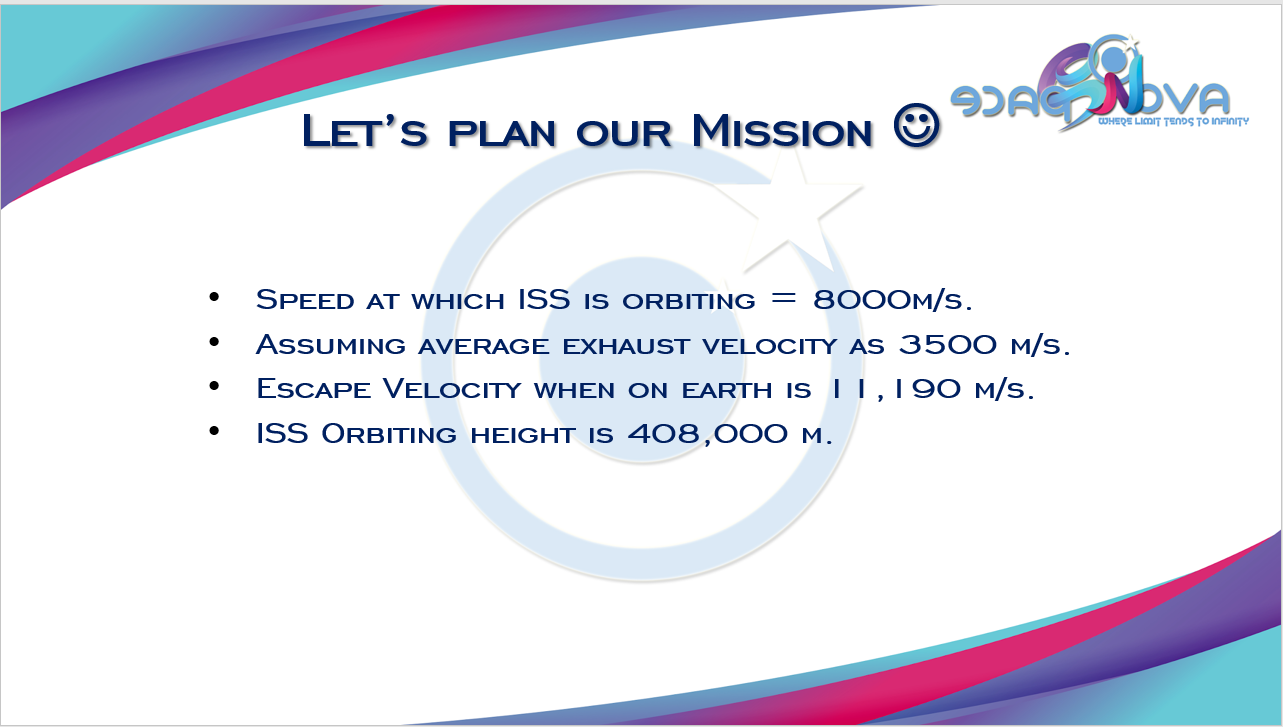

\begin{equation*}
\frac{m_f}{m_o}=e^{-\frac{v_f}{v_e}}
\end{equation*}


In [4]:
# mf=final_mass (payload mass)
# mo=initial_mass (payload mass+mass of fuel)
# vf=final_velocity
# ve=exhaust_velocity
# mo-mf= mass of fuel to dock it at iss
import math
import astropy.units as u
mf=140000 
vf=8000
ve=3500
m0=mf/math.exp(-1*vf/ve)
f_iss=(m0-mf)
f_iss * u.kg

<Quantity 1236578.99098576 kg>

In [7]:
mf=140000 
vf=11190
ve=3500
mo_1=mf/math.exp(-1*11190/ve)
f_escape=(mo_1-mf)#fuel needed to go to attain escape velocity
(f_escape-f_iss)* u.kg#extra fuel needed to attain escape velocity from ISS

<Quantity 2048176.22977788 kg>

# Integration, Differentiation and Limits

For this particular segment, we will use **sympy** library

In [17]:
# Import all from sympy
from sympy import *

$$\frac{d}{dx} cos(x)$$

In [18]:
x = Symbol('x')
sin(x)

sin(x)

In [20]:
diff(cos(x),x)

-sin(x)

In [23]:
y=x**6*tan(x)/(log(x)*cos(x))
y

x**6*tan(x)/(log(x)*cos(x))

In [24]:
diff(y,x)

x**6*(tan(x)**2 + 1)/(log(x)*cos(x)) + x**6*sin(x)*tan(x)/(log(x)*cos(x)**2) + 6*x**5*tan(x)/(log(x)*cos(x)) - x**5*tan(x)/(log(x)**2*cos(x))

In [ ]:
diff(cos(x), x)

In [26]:
Derivative(y, x)

Derivative(x**6*tan(x)/(log(x)*cos(x)), x)

In [27]:
Derivative(y, x).doit()

x**6*(tan(x)**2 + 1)/(log(x)*cos(x)) + x**6*sin(x)*tan(x)/(log(x)*cos(x)**2) + 6*x**5*tan(x)/(log(x)*cos(x)) - x**5*tan(x)/(log(x)**2*cos(x))

\begin{equation} \int \frac{tan^{-1}x}{1+\frac{1}{x^2}}dx \end{equation}

In [31]:
y=atan(x)/(1+1/x**2)
Integral(y,x).doit()

x*atan(x) - log(x**2 + 1)/2 - atan(x)**2/2

In [32]:
integrate(y, x)

x*atan(x) - log(x**2 + 1)/2 - atan(x)**2/2

\begin{equation} \int_{0}^{\infty} \frac{ln(x)}{ 1+x^2}dx \end{equation}

In [37]:
Integral(ln(x)/(1+x**2),(x,0,oo)).doit()

0

In [38]:
oo

oo

In [116]:
pi

pi

$$\lim_{x\to{\frac{\pi}{2}}} \frac{(1-sin(x))(1-tan\big(\frac{x}{2}\big))}{(\pi-2x)^3(1+tan\big(\frac{x}{2}\big))}$$

In [45]:
y=(1-tan(x/2))*(1-sin(x))/((1+tan(x/2))*(pi-2*x)**3)
limit(y,x,pi/2)

1/32

In [43]:
Limit(y,x,pi/2).doit()

1/32

In [125]:
Limit(y,x,pi/2,dir='-')

Limit((1 - sin(x))*(1 - tan(x/2))/((pi - 2*x)**3*(tan(x/2) + 1)), x, pi/2, dir='-')

# Mars Opposition

In [47]:
import matplotlib.pyplot as plt
import datetime
import solarsystem

In [50]:
H = solarsystem.Heliocentric(year=2018, month=7, day=27, hour=0, minute=0 )
planets=H.planets()
# print(planets)
distances=[]
print('Planet', '   \t','Longitude', '  \t','Latitude', '   \t\t','Distance')
print('-------------------------------------------------------------------')
for key in planets:
    distances.append(planets[key][2])
    elements = planets[key]
    print(key, '   \t',round(elements[0],2), '  \t',round(elements[1],2), '   \t\t',round(elements[2],2))
print()
print('Distance is in AU')

Planet    	 Longitude   	 Latitude    		 Distance
-------------------------------------------------------------------
Mercury    	 275.84   	 -5.16    		 0.46
Venus    	 247.8   	 0.53    		 0.73
Earth    	 303.95   	 0.0    		 1.02
Mars    	 304.02   	 -1.78    		 1.4
Jupiter    	 234.45   	 0.94    		 5.39
Saturn    	 276.72   	 0.72    		 10.08
Uranus    	 29.61   	 359.46    		 19.87
Neptune    	 344.84   	 -0.96    		 29.93
Pluto    	 290.09   	 0.14    		 33.54
Ceres    	 176.37   	 10.52    		 2.56
Chiron    	 359.34   	 3.48    		 18.69
Eris    	 23.24   	 -12.02    		 96.11

Distance is in AU


In [52]:
year=2020
month=10
lat=[]
for day in range(1,32):
    H = solarsystem.Heliocentric(year=year, month=month, day=day, hour=0, minute=0, UT=0, dst=0, view='horizontal' )
    planets=H.planets()
    lat.append(abs(planets['Earth'][0]-planets['Mars'][0]))
if(np.min(lat)<0.5):
    print("Will Occur",end=" ")
else:
    print("Next janam",end=' ')
print(np.min(lat),np.argmin(lat))

Will Occur 0.009451221840290458 13


In [53]:
year=2020
lat=[]
for month in range(1,13):
    days=[0,32,30,32,31,32,31,32,32,31,32,31,32]
    for day in range(1,days[month]):
        H = solarsystem.Heliocentric(year=year, month=month, day=day, hour=0, minute=0, UT=0, dst=0, view='horizontal' )
        planets=H.planets()
        distances=[]
        lat.append(abs(planets['Earth'][0]-planets['Mars'][0]))
if(np.min(lat)<0.5):
    print("Will Occur",end=" ")
else:
    print("Next janam",end=' ')
print(np.min(lat),np.argmin(lat))
# lat

Will Occur 0.009451221840290458 287


In [54]:
for year in range(2011,2200):
    lat=[]
    for month in range(1,13):
        days=[0,32,29,32,31,32,31,32,32,31,32,31,32]
        for day in range(1,days[month]):
            H = solarsystem.Heliocentric(year=year, month=month, day=day, hour=0, minute=0, UT=0, dst=0, view='horizontal' )
            planets=H.planets()
            distances=[]
            lat.append(abs(planets['Earth'][0]-planets['Mars'][0]))
    if(np.min(lat)<0.05):
        print("Will Occur",end=" ")
        print(year,np.min(lat),np.argmin(lat))
#     else:
#         print("Next janam",end=' ')
    

Will Occur 2020 0.009451221840290458 286
Will Occur 2033 0.018087553534996914 178
Will Occur 2054 0.03322186824610185 351
Will Occur 2057 0.03323732472982499 23
Will Occur 2063 0.029660592520457385 134
Will Occur 2065 0.041948421170104666 194
Will Occur 2072 0.029125574161383838 10
Will Occur 2074 0.045890906297046286 44
Will Occur 2078 0.026807466014304282 116
Will Occur 2086 0.04862608428076953 360
Will Occur 2093 0.03982855513717709 100
Will Occur 2097 0.04042099095335061 211
Will Occur 2110 0.025036116584459478 126
Will Occur 2116 0.04864089469450761 325
Will Occur 2125 0.004050410067122812 109
Will Occur 2148 0.00769963441761945 336
Will Occur 2153 0.03667772459579055 46
Will Occur 2159 0.017254606642154613 171
Will Occur 2174 0.005581317638927885 148
Will Occur 2176 0.02223862220699857 215
Will Occur 2180 0.04653302502119061 346
Will Occur 2191 0.014892142513190265 186
Will Occur 2198 0.01763038816748974 6


In [64]:
%matplotlib inline
Hr = solarsystem.Heliocentric(year=2018, month=7, day=27, hour=0, minute=0, UT=0, dst=0, view='rectangular' )
planetspositionsHrect=Hr.planets()
forplot=[]
planetname=[]
for key in planetspositionsHrect:
    if key == 'Jupiter':
        break
    planetname.append(key)
    forplot.append(planetspositionsHrect[key] )

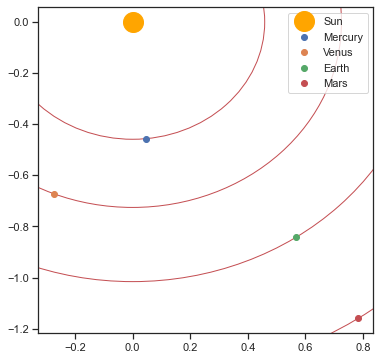

In [66]:
plt.figure(figsize=(6,6))
ax = plt.gca()
ax.cla()
a=0.5
ax.plot(0,0,'o', label='Sun',markersize=20,color='orange') 
for i in range(4):
    ax.plot(forplot[i][0] , forplot[i][1] ,'.', markersize=12, label=planetname[i]) 
    ax.add_artist(plt.Circle((0, 0), ((abs(forplot[i][0])**2+abs(forplot[i][1])**2)**0.5), color='r', fill=False))
ax.legend()
plt.show()